<a href="https://colab.research.google.com/github/korobool/hlll_course/blob/master/topics/points_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
keras.__version__

'2.8.0'


# The most simple Neural Networks for linear regression 

reduces to linear function of one variable and no activation - just linear output. Formally it is not a real neural network, because it doesn't contain any non linear activations.

Linear regression in Keras primitives
$$y(x)=wx+b$$

### Create an example data

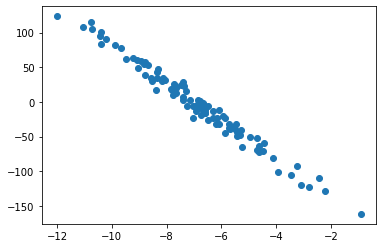

In [ ]:
from sklearn.datasets import make_regression
from matplotlib import pyplot
# generate regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=8)
X += -3*X - 7
# plot regression dataset
pyplot.scatter(X,y)
pyplot.show()

In [ ]:
import keras
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(1, activation='linear',input_shape=(1,)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow as tf
model.compile(loss='mae',

             optimizer=tf.optimizers.Adam(learning_rate=0.5),
             metrics=['mae','mse'])

In [ ]:
history = model.fit(
      X,
      y,
      epochs=300,
      verbose=0)

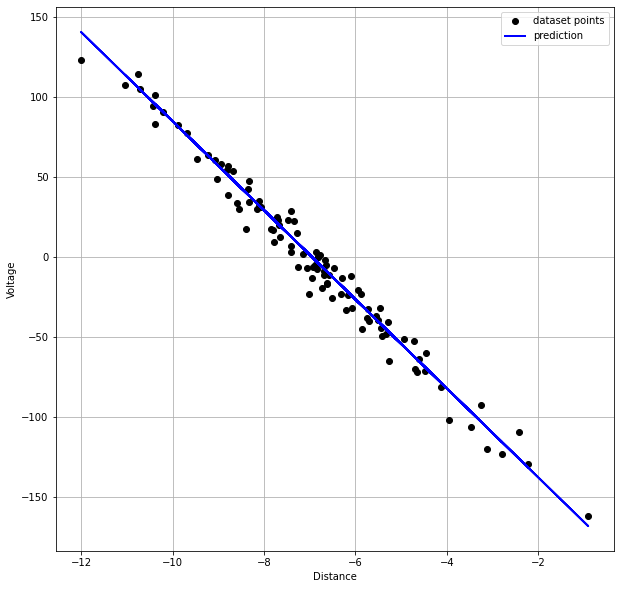

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

x_p = np.linspace(X.min(),X.max(),1000)
y_p = model.predict((X))

fig, axes = plt.subplots(1)
fig.set_size_inches(10, 10) 

axes.plot(X, y,'o', label = 'dataset points', linewidth=2.0, c='black')
axes.plot(X, y_p, label = 'prediction', linewidth=2.0, c='blue')

axes.legend()
axes.grid()

axes.set_ylabel("Voltage")
axes.set_xlabel("Distance")

plt.show()

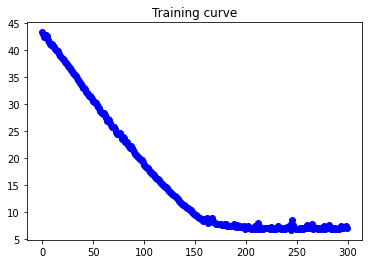

In [ ]:
import matplotlib.pyplot as plt

mae = history.history['mae']

loss = history.history['loss']
epochs = range(len(mae))


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training curve')

plt.show()


### Non linear curve approximation for function of one variable

$$y=f(x)$$

### Define data

In [ ]:
import numpy as np
transformation_map = [
                      [00.0, 0.03],
                      [00.8, 1.37],
                      [02.0, 2.22],
                      [02.5, 2.75],
                      [03.0, 3.05],
                      [03.5, 3.00],
                      [04.0, 2.73],
                      [05.0, 2.35],
                      [06.0, 2.01],
                      [07.0, 1.77],
                      [08.0, 1.56],
                      [09.0, 1.40],
                      [10.0, 1.28],
                      [12.0, 1.07],
                      [14.0, 0.93],
                      [16.0, 0.81],
                      [18.0, 0.72],
                      [20.0, 0.65],
                      [25.0, 0.53],
                      [30.0, 0.45],
                      [35.0, 0.37],
                      [40.0, 0.31],
                      ]
x = np.array([item[0] for item in transformation_map])
y = np.array([item[1] for item in transformation_map])

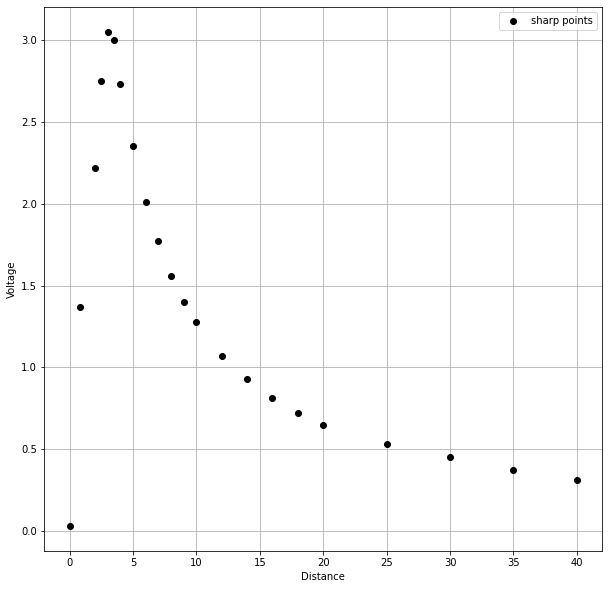

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1)
fig.set_size_inches(10, 10)

axes.plot(x, y,'o', label = 'sharp points', linewidth=2.0, c='black')

axes.legend()
axes.grid()

axes.set_ylabel("Voltage")
axes.set_xlabel("Distance")

plt.show()

In [ ]:
import keras
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(8, activation='tanh',input_shape=(1,)))
model.add(layers.Dense(4, activation='tanh',))

model.add(layers.Dense(1, activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 16        
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow as tf
model.compile(loss='mse',

             optimizer=tf.optimizers.Adam(learning_rate=1e-2),
             metrics=['mae','mse'])

In [ ]:
history = model.fit(
      x,
      y,
      epochs=800,
      verbose=0)

In [ ]:
# dir(history)

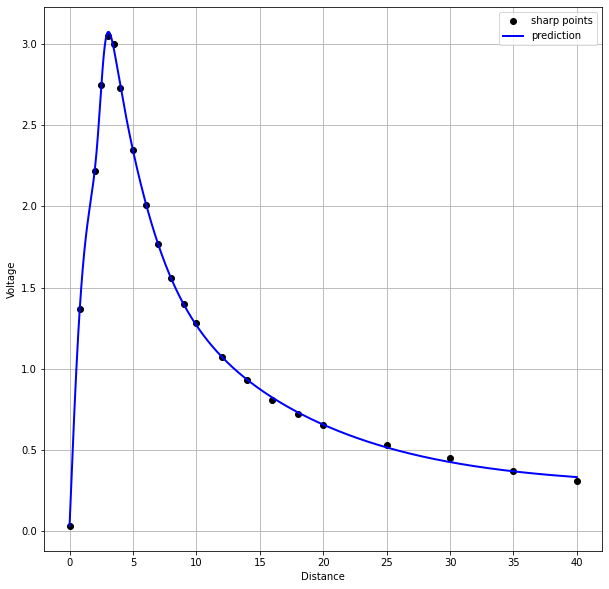

In [ ]:
x_p = np.linspace(0,40,1000)
y_p = model.predict((x_p))

fig, axes = plt.subplots(1)
fig.set_size_inches(10, 10) 

axes.plot(x, y,'o', label = 'sharp points', linewidth=2.0, c='black')
axes.plot(x_p, y_p, label = 'prediction', linewidth=2.0, c='blue')

axes.legend()
axes.grid()

axes.set_ylabel("Voltage")
axes.set_xlabel("Distance")

plt.show()

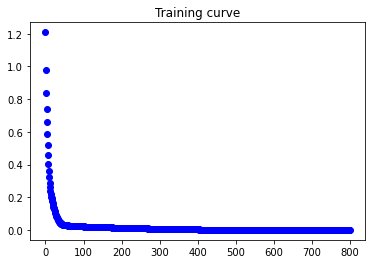

In [ ]:
import matplotlib.pyplot as plt

mae = history.history['mae']

loss = history.history['loss']
epochs = range(len(mae))


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training curve')

plt.show()

# A simple Neural Networks for classification
Items of two features X0 X1 and binary class y 

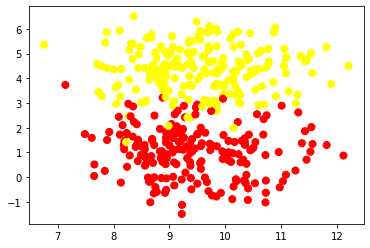

In [ ]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np


X, y = make_blobs(n_samples=500, centers=2, n_features=2,random_state=4)
# X, y = make_moons(n_samples=1250, noise=0.17)

# encoder = LabelEncoder()
# encoder.fit(y)
# # y = encoder.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
# plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap='winter')

In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler().fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

### The most simple NN for classification is logistic regression
Logistic regression is a neural network with one neuron with sigmoid activation

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(1, activation='sigmoid',input_shape=(2,)))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import schedules
#lr_schedule = schedules.ExponentialDecay(
#    initial_learning_rate=0.1,
#    decay_steps=10,
#    decay_rate=0.9)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(
              #learning_rate=lr_schedule,
              learning_rate=1e-2),
              metrics=['acc'])

In [ ]:
history = model.fit(
      X_train,
      y_train,
      #batch_size=10,
      epochs=100,
      validation_split=0.2,
      verbose=0)

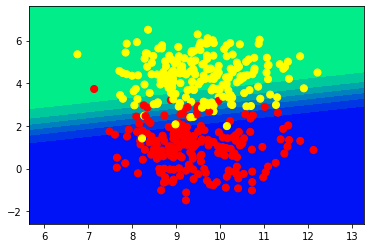

In [ ]:
min1, max1 = (X_train[:,0].min()-1.1, X_train[:,0].max()+1.1)
min2, max2 = (X_train[:,1].min()-1.1, X_train[:,1].max()+1.1)

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# make predictions for the grid
yhat = model.predict(grid)
# reshape the predictions back into a grid

# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)


# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='winter')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')

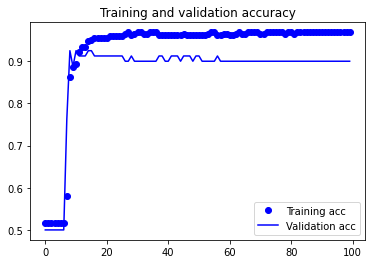

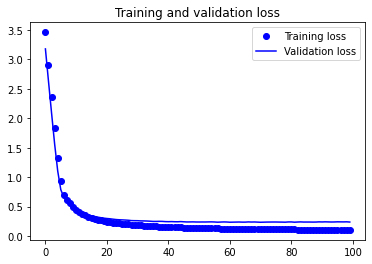

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### More complex NN
Multi Layered Perception

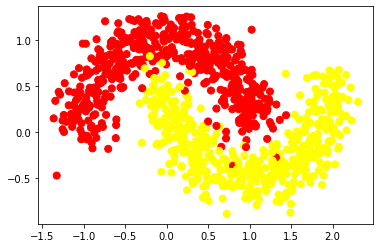

In [ ]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np


# X, y = make_blobs(n_samples=1000, centers=2, n_features=2,random_state=4)
X, y = make_moons(n_samples=1250, noise=0.17)

# encoder = LabelEncoder()
# encoder.fit(y)
# # y = encoder.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
# plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap='winter')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

(1000, 2)

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.optimizers import schedules
# lr_schedule = schedules.ExponentialDecay(
#     initial_learning_rate=1e-2,
#     decay_steps=200,
#     decay_rate=0.8)

# model.compile(loss='mse',

#              optimizer=tf.optimizers.Adam(learning_rate=lr_schedule),
#              metrics=['mae','mse'])

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(8, activation='relu',input_shape=(2,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 8)                 24        
                                                                 
 dense_6 (Dense)             (None, 8)                 72        
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import schedules
lr_schedule = schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=1000,
    decay_rate=0.9)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=lr_schedule),
              metrics=['acc'])

In [ ]:
history = model.fit(
      X_train,
      y_train,
      batch_size=10,
      epochs=12,
      validation_split=0.2,
      verbose=0)

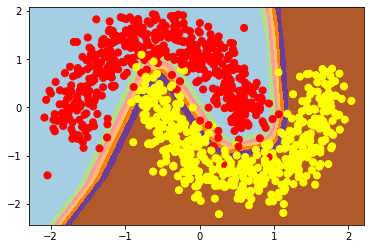

In [ ]:
min1, max1 = (X_train[:,0].min()*1.1, X_train[:,0].max()*1.1)
min2, max2 = (X_train[:,1].min()*1.1, X_train[:,1].max()*1.1)

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# make predictions for the grid
yhat = model.predict(grid)
# reshape the predictions back into a grid

# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)


# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')

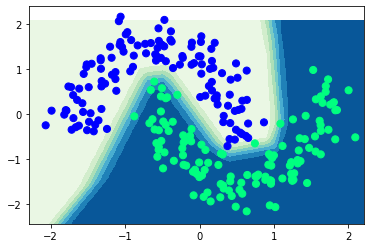

In [ ]:
plt.contourf(xx, yy, zz, cmap='GnBu')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap='winter')

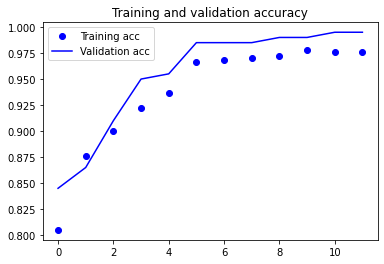

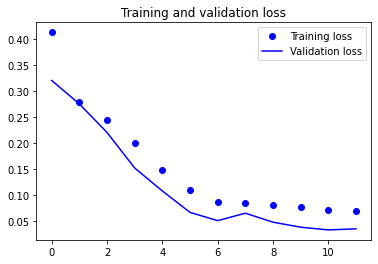

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()